## Применение методов машинного обучения при анализе

Для реализации применения алгоритмов машинного обучения при анализе данных об испытаниях образцов необходимо решить две задачи:

1. Произвести преобработку данных полученных при испытании образцов. В виду специфики использовуемого метода, которые будут описаны далее в ходе данной статьи, необходимо осуществить отбор признаков (feature engeneering), изучить корреляцию выбранных признаков, характер распределения значений в полученных выборках. 
2. Спроектировать и обучить предсказательную модель для одного из целевых признаков


По результатам испытаний имеется 50 выходных файлов в формате .txt. Первая цифра в имени файла означает высоту поперечного сечения рабочей области образца. Ширина сечения рабочей области образца одинаковая для всех образцов и равняется 10 мм. Цифра после дефиса означает порядковый номер образца. Для каждого сечения было изготовлено и испытано 10 образцов. 
Для предобработки данных и построения предсказательной модели используется язык программирования (ЯП) python 3.8.10. Преимуществами данного ЯП является его простой синтаксис и адекватное быстродействие для реализуемых задач, а также наличие широкого инструментария подключемых библиотек, облегчающих процесс анализа данных. 


Для начала работы с данными необходимо произвести отбор признаков, а также привести данные в общепринятую форму. Для анализа данных и построения различного рода моделей машинного обучения применяется следующая структура данных: (описание структуры данных: таблицы)

Проведение эксперимента ставило перед собой задачи подтвердить следующие гипотезы: 
1. Максимальная нагрузка, которую способен выдержать образец из печатного пластика статистически значимо зависит от площади поперечного сечения 
2. Возможно установить взаимосвязь и предсказать максимальную нагрузку, которую способен выдержать образец из печатного пластика, основываясь на прочих параметрах

Таким образом для признаков в таблицы были выбраны: максимально достигнутая нагрузка (параметр max_force), перемещение траверсы при данной нагрузке (параметр max_lenght), время, прошедшее от начала процесса растяжения до достижения максимальной нагрузки (параметр max_time), площадь поперечного сечения(параметр section_area), а также бинарный признак is_valid, который равняется 1 в случае, если образец порвался в рабочей зоне, и равен 0 в противном случае.   

Для начала работы с данными внутрь среды разработки импортируются необходимые библиотеки для работы с данными: 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

%matplotlib inline

* Pandas - 
* Nympy
* matplotlib
* seaborn 
* os - 
* %matplotlib inline


Для записи признаков необходимо создать таблицу с выбранными столбцами признаков и форматом этих столбцов, что реализуется при помощи библиотеки Pandas. 

In [7]:
experiment_data = pd.DataFrame({
        'max_force':[],
        'max_lenght':[],
        'max_time':[],
        'section_area':pd.Series([], dtype=np.dtype('int32')),
        'is_valid': pd.Series([], dtype=np.dtype('bool_')),
    })

Также создадим переменную whitelist, которая хранит в себе список образцов, которые порвались в рабочей зоне.

In [6]:
whitelist = ['3-2', '3-3', '3-5', '3-9', '3-10', '4-2', '5-6', '5-7', '5-10', '6-1', '6-3', '6-8', '6-9', '7-1', '7-3', '7-7', '7-8', '7-9']

Необходимо просмотреть каждый файл с результатами испытаний. Для решения данной задачи воспользуемся циклом. В результате чтения файла создадим промежуточную таблицу data, в которую будут вноситься результаты испытаний для каждого образца. Затем внутри этой таблицы будет происходить отбор признаков и запись их в исходную таблицу experiment_data. Когда все 50 файлов будут прочитаны и обработаны таблица experiment_data будет сохранена в формате CSV - Comma-Separated Values — текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми.

In [9]:
for file in sorted(os.listdir('Data_samples/')):

    column_names = ['time', 'force', 'lenght']

    data = pd.read_csv(f'Data_samples/{file}', sep='\t', skiprows=17, decimal=',', names = column_names)

    name = file.split('.')[0]
    section_area = int(file[0]) * 10 
    max_force = data.force.max()
    max_lenght = data.loc[data.index[data.force.idxmax()], 'lenght']
    max_time = data.loc[data.index[data.force.idxmax()], 'time']

    if name in whitelist: 
        is_valid = True
    else:
        is_valid = False

    new_value = {
        'max_force': max_force,
        'max_lenght':max_lenght,
        'max_time':max_time,
        'section_area':section_area,
        'is_valid':is_valid
    }

    experiment_data.loc[f'{name}'] = new_value

experiment_data.to_csv('experiment_data.csv')

Убедиться в правильности построения таблицы можно просмотрев первые 5 значений полученной таблицы, воспользовавшись соответствующей командой: 

In [10]:
experiment_data.head(5)

,max_force,max_lenght,max_time,section_area,is_valid
3-1,922.5591,2.064367,123.86,30,False
3-10,871.8252,2.029167,121.75,30,True
3-2,879.5913,1.945533,116.73,30,True
3-3,831.2734,1.874533,112.47,30,True
3-4,810.5214,1.835533,110.13,30,False


Убедиться что все 50 образцов попали в наши данные можно выполнив команду: 
Первое число в скомбках означает число строк в таблице, а второе - число столбцов с признаками

In [14]:
experiment_data.shape

(42, 5)

Для изучения взаимосвязи между признаками можно воспользоваьтся таким статистическим параметром как коэффициент корреляции. характеризует величину отражающую степень взаимосвязи двух переменных между собой. Он может варьировать в пределах от -1 (отрицательная корреляция) до +1 (положительная корреляция). Если коэффициент корреляции равен 0 то, это говорит об отсутствии корреляционных связей между переменными. 
Рассмотреть взаимную корреляцию признаков между собой можно при помощи тепловой карты (heatmap). По вертикали и по диагонали отложены признаки, представленные в таблице. На пересечении строки и столбца указывается коэффициент корреляции соответствующей пары признаков. Тепловая карта для количественных признаков строится следующим образом: 

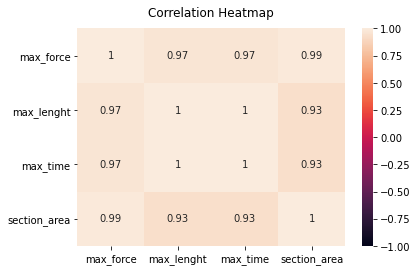

In [16]:
heatmap = sns.heatmap(
    experiment_data.drop('is_valid', axis=1).corr(), 
    vmin=-1,
    vmax=1,
    annot=True
    )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Таким образом можно заметить, что у признаков max_force, max_lenght, max_time очень высокая корреляция. Учитывая принцип работы испытательнйо машины, а также способ отбора признаков это говорит о правильности проведенной предобработки данных. Наибольший интерес представляет пара признаков max_force/section_area. Замечена высокая корреляция данных признаков, что может говорить о том, что обнаружена явная линейная зависимость данных признаков друг от друга. Для более явного представления распределений полученных признаков, а также их отношения можно воспользоваться диаграммой pairplot, которая строит матрицу графиков, показывающих распределения пар признаков относительно друг друга. На диагонали (самопересечение признаков) при этом строится гистограмма частот. Построить данный график для не номинативных признаков можно следующим образом: 

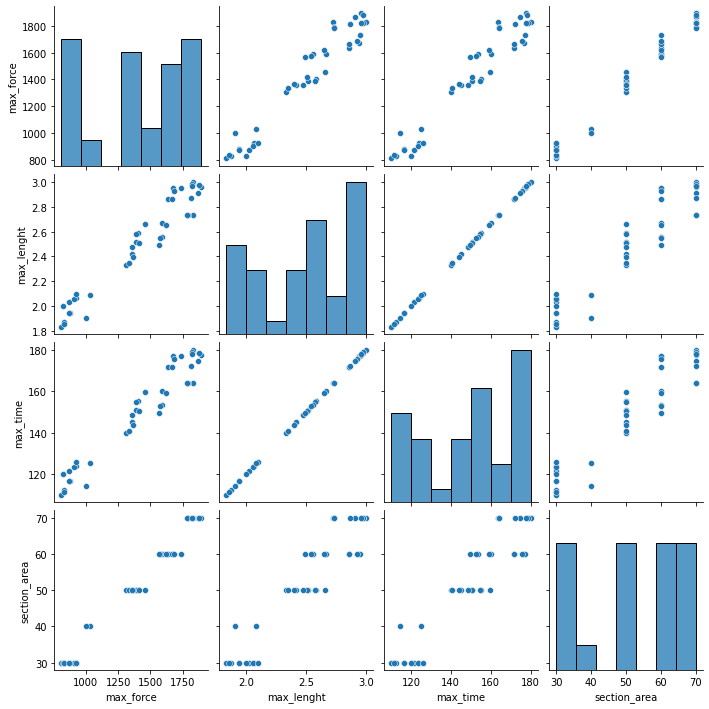

In [18]:
sns.pairplot(experiment_data.drop('is_valid', axis=1));

Также испортированные библиотеки ЯП python позволяют произвести анализ распределений признаков на наличие выбросов. Для каждого значения площади можно построить диаграмму "Ящик с усами" (box-plot). 

Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов).

Изучим распределение параметра max_force в зависимости от значения параметра section_area и выясним, присутствуют ли в данных выборках выбросы. Построить диграмму для выбранного значения площади можно следующим способом:

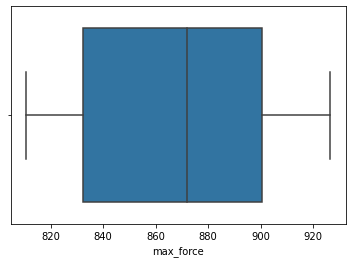

In [29]:
sns.boxplot(x=experiment_data[experiment_data.section_area == 30].max_force);

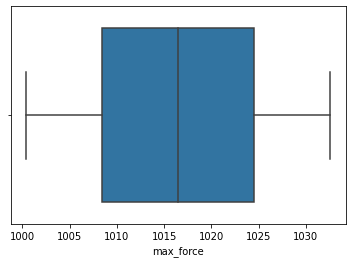

In [30]:
sns.boxplot(x=experiment_data[experiment_data.section_area == 40].max_force);

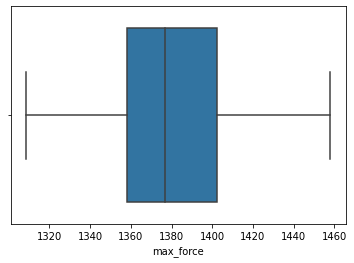

In [31]:
sns.boxplot(x=experiment_data[experiment_data.section_area == 50].max_force);

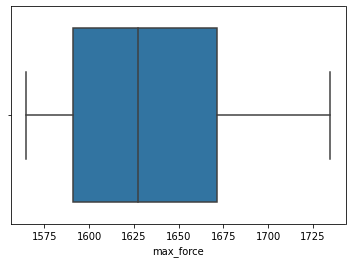

In [32]:
sns.boxplot(x=experiment_data[experiment_data.section_area == 60].max_force);

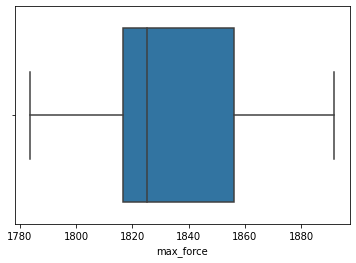

In [33]:
sns.boxplot(x=experiment_data[experiment_data.section_area == 70].max_force);